/home/julian/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


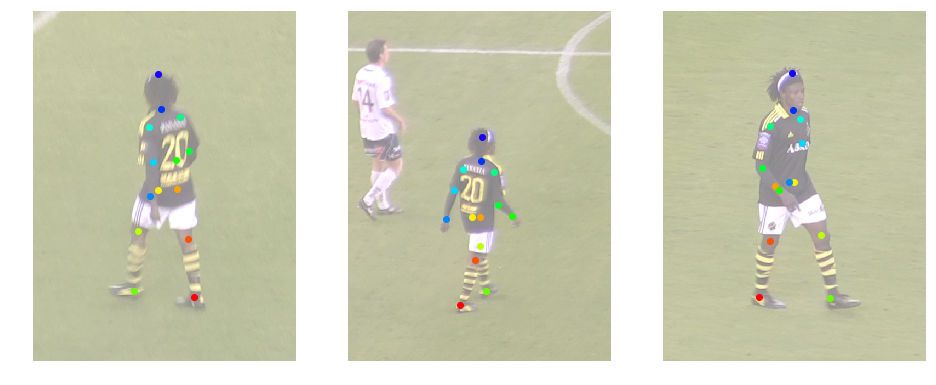

In [1]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../'); sys.path.insert(0, '.')
import paf_loader
import numpy as np
import cv2
from cselect import color as cs
from time import time
import mvpose.data.kth_football2 as kth

colors = cs.lincolor(20).astype('float32')/255
FRAME = 100
data_root = Settings['data_root']
seq1_zipname = 'player1sequence1.zip'
seq1_dir = 'Sequence 1'
Im, Calib, pos2d, pos3d = kth.get(data_root, seq1_zipname, seq1_dir, FRAME)

fig = plt.figure(figsize=(16,8))
for cid, im in enumerate(Im):
    ax = fig.add_subplot(1,3,cid+1); ax.axis('off')
    ax.imshow(im, alpha=0.5)
    joints = pos2d[:,:,cid]
    for jid, (x,y) in enumerate(joints):
        ax.scatter(x,y,color=colors[jid])

plt.show()

(14, 3)


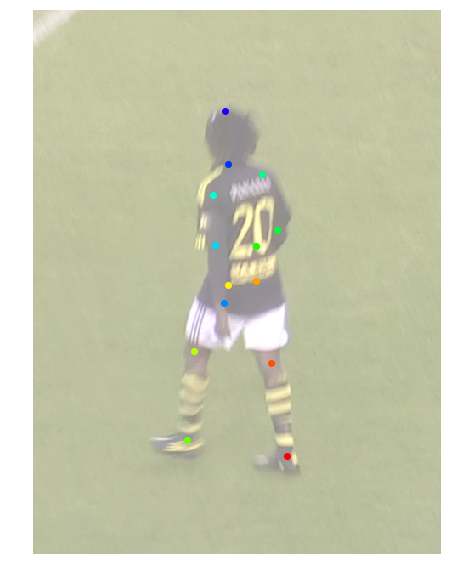

In [2]:
CID = 0
print(pos3d.shape)

im = Im[CID]
cam = Calib[CID]

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111); ax.axis('off')
ax.imshow(im, alpha=0.5)
projected2d = cam.projectPoints(pos3d)
for jid, (x,y) in enumerate(projected2d):
    ax.scatter(x, y, color=colors[jid])

plt.show()